In [1]:
# import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# lets read the csv file
cars = pd.read_csv('true_car_listings.csv')

In [3]:
# lets see the random 5 rows
cars.sample(5)

,Price,Year,Mileage,City,State,Vin,Make,Model
36967,28000,2015,27923,Burleson,TX,5UXWZ7C54F0F75891,BMW,X3sDrive28i
589529,18986,2016,21707,Westfield,MA,JM1DKBC79G0109633,Mazda,CX-3AWD
787682,15495,2008,67372,Springfield,VA,JTEES43A182016022,Toyota,Highlander4WD
215029,18775,2015,47052,South Gate,CA,2C3CDZAGXFH894745,Dodge,ChallengerSXT
497709,15794,2012,93214,Fremont,CA,1C4RJFAG1CC218373,Jeep,Grand


In [4]:
# lets get the info about the rows and columns
cars.info()

# Columns
# Price - Target Variable.
# Year - Year of the car purchased.
# Mileage - The no.of kms drove by the car.
# City - In which city it was sold.
# State - In which state it was sold.
# Vin - a unique number for a car.
# Make - Manufacturer of the car.
# Model - The model(name) of the car.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852122 entries, 0 to 852121
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    852122 non-null  int64 
 1   Year     852122 non-null  int64 
 2   Mileage  852122 non-null  int64 
 3   City     852122 non-null  object
 4   State    852122 non-null  object
 5   Vin      852122 non-null  object
 6   Make     852122 non-null  object
 7   Model    852122 non-null  object
dtypes: int64(3), object(5)
memory usage: 52.0+ MB


In [5]:
# lets check the unique values in year column
cars['Year'].unique()

# there are total 22 unique years

array([2014, 2013, 2016, 2012, 2009, 2015, 2010, 2011, 2007, 2006, 2008,
       2004, 2017, 2005, 2003, 2002, 1999, 2001, 2000, 1998, 2018, 1997],
      dtype=int64)

In [6]:
# lets check the unique values in city column
cars['City'].value_counts()

City
Houston          12703
San Antonio       8078
Louisville        5872
Jacksonville      5675
Austin            5297
                 ...  
Pleasant Hill        4
Port Jervis          4
Los Banos            4
Pen Argyl            4
Royston              2
Name: count, Length: 2553, dtype: int64

In [7]:
# lets transform the city column
cars['City'] = cars['City'].apply(lambda x: x.replace(" ", '').lower())

In [8]:
# lets check the unique values of state column
cars['State'].unique()

array([' TX', ' NY', ' CO', ' UT', ' FL', ' CT', ' ID', ' ND', ' CA',
       ' NJ', ' OH', ' VA', ' IN', ' AZ', ' OR', ' KS', ' NE', ' MA',
       ' MD', ' GA', ' MN', ' HI', ' LA', ' NM', ' IL', ' AL', ' PA',
       ' SC', ' NC', ' WA', ' WI', ' OK', ' KY', ' MS', ' MO', ' ME',
       ' AR', ' MI', ' NV', ' TN', ' Fl', ' NH', ' DE', ' WV', ' Az',
       ' VT', ' SD', ' IA', ' RI', ' ga', ' Oh', ' MT', ' DC', ' AK',
       ' Va', ' WY', ' Md', ' Ca', ' Ga'], dtype=object)

In [9]:
# lets transform the state column
cars['State'] = cars['State'].apply(lambda x: x.lower())

In [10]:
# lets check the unique values present in Make column
cars['Make'].unique()

array(['Acura', 'Alfa', 'AM', 'Aston', 'Audi', 'Bentley', 'BMW', 'Buick',
       'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'Ferrari', 'FIAT',
       'Fisker', 'Ford', 'Freightliner', 'Genesis', 'Geo', 'GMC', 'Honda',
       'HUMMER', 'Hyundai', 'INFINITI', 'Isuzu', 'Jaguar', 'Jeep', 'Kia',
       'Lamborghini', 'Land', 'Lexus', 'Lincoln', 'Lotus', 'Maserati',
       'Maybach', 'Mazda', 'McLaren', 'Mercedes-Benz', 'Mercury', 'MINI',
       'Mitsubishi', 'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac',
       'Porsche', 'Ram', 'Rolls-Royce', 'Saab', 'Saturn', 'Scion',
       'smart', 'Subaru', 'Suzuki', 'Tesla', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [11]:
# lets convert all the Manufacturer values to lower case and remove - if available
cars['Make'] = cars['Make'].apply(lambda x: x.replace('-', '').lower())

In [12]:
# lets check the models
cars['Model'].value_counts()

Model
Silverado          24932
Grand              17321
Accord             14502
F-1504WD           14177
Altima2.5          11288
                   ...  
EdgeLTD                1
ExpeditionEddie        1
EscortSE               1
Ranger                 1
V60Polestar            1
Name: count, Length: 2736, dtype: int64

## Dataset Preparation 

In [13]:
# lets see the description of numeric columns
cars.describe()

,Price,Year,Mileage
count,852122.000000,852122.000000,8.521220e+05
mean,21464.100210,2013.289145,5.250779e+04
std,13596.202241,3.414987,4.198896e+04
min,1500.000000,1997.000000,5.000000e+00
25%,13000.000000,2012.000000,2.383600e+04
50%,18500.000000,2014.000000,4.025600e+04
75%,26995.000000,2016.000000,7.218600e+04
max,499500.000000,2018.000000,2.856196e+06


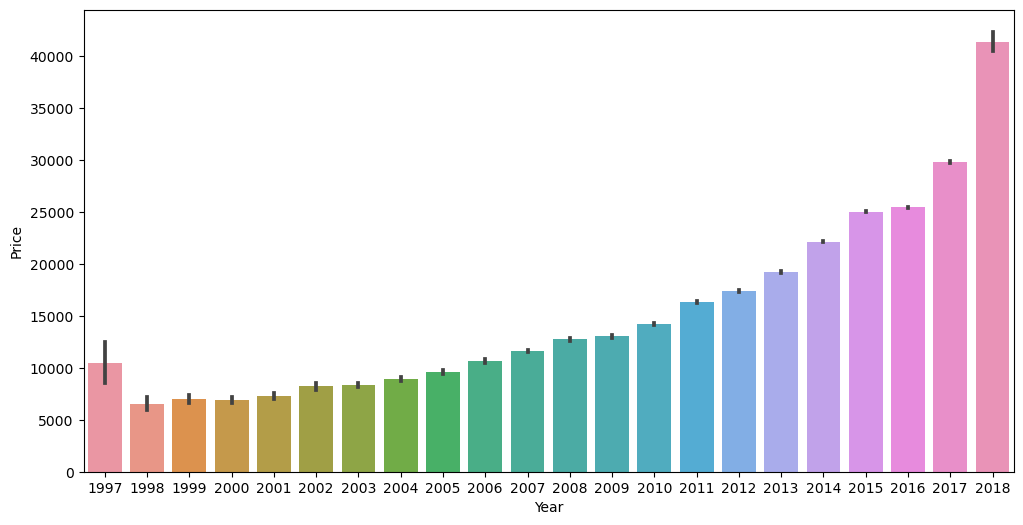

In [14]:
plt.figure(figsize=(12, 6))
sns.barplot(x = 'Year', y = 'Price', data = cars)
plt.show()

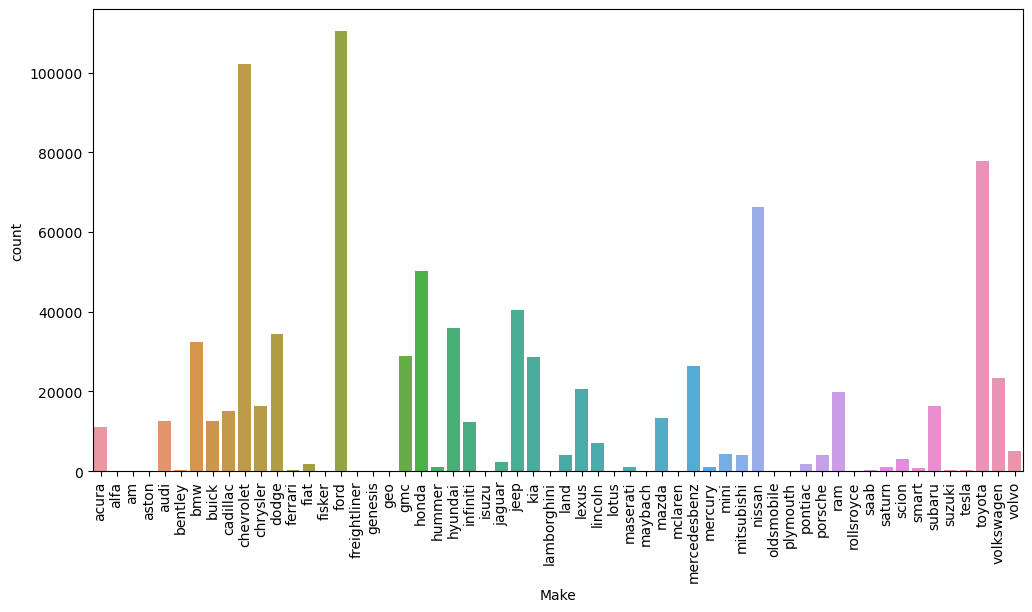

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(x = 'Make', data = cars)
plt.xticks(rotation=90)
plt.show()

In [16]:
# lets import some required classes for data transformation
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split

In [46]:
# lets use the Column Transformer
transformed_data = ColumnTransformer(transformers=[('OneHotEncoding', OneHotEncoder(), ['City', 'State', 'Make','Model']),
                               ('MinMaxScaler', MinMaxScaler(), ['Mileage'])], remainder='passthrough')
transformed_data

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHotEncoding', OneHotEncoder(),
                                 ['City', 'State', 'Make', 'Model']),
                                ('MinMaxScaler', MinMaxScaler(), ['Mileage'])])

In [47]:
# lets transform the data of all the columns 
X = transformed_data.fit_transform(cars[['City', 'State', 'Make', 'Model', 'Mileage', 'Year']])

In [67]:
# lets split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, cars['Price'], test_size=0.3, random_state= 3, shuffle=True)

## Model Building

In [20]:
# lets import some regressors which we would like to use
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Model Training and Evaluating

In [21]:
# lets define the model
linreg = LinearRegression()

In [68]:
# lets train linear regression model and evaluate
linreg.fit(X_train, y_train)
y_pred1 = linreg.predict(X_test)
r2_score(y_test, y_pred1)

0.8675524111509061